# Data Science 100 Project: Planning Stage (Individual) Amanda Huang

In [7]:
#Loading the relevant R package:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



## Data Description

Minecraft is a 2011 sandbox game developed and published by Swedish video game developer Mojang Studios(Wikipedia contributors, 2025). And it has since been an iconic video game among many young people, ranking number 3 wolrdwide today. 

This study uses data from a UBC Computer Science research group led by Frank Wood. They had set up a MineCraft server, and recorded various player actions data as the players navigate through the server. The data contain information on the player's skill level, demographic, and play sessions. 

 #### The data consists of two files:
   1. **players.csv**: a list of data of all unique players
   2. **sessions.csv**: a list of individual play sessions by each player. 

#### Descriptions for the `players.csv` file:

- Number of variables: **7**
- Number of observations: **195**
1. `experience` -the level of experience of the player (Beginner (least experienced), Amateur, Regular, Veteran, Pro (most experienced))
2. `subscribe`- whether subscribed to a game newsletter or not (True, or False)
3. `hashedEmail`- private personal Email information
4. `played_hours`- the number of hours played by the player (hours)
5. `name`- the player’s name
6. `gender`- gender (male, female, non-binary, agender, two-spirited, prefer not to say)
7. `age`- age (years)


#### Descriptions for the `sessions.csv` file:

- Number of variables: **5**
- Number of observations: **1534**
1. `hashedEmail` -private personal Email information
2. `start_time`- start time, human-readable timestamp
3. `end_time`- end time, human-readable timestamp
4. `original_start_time`- UNIX time stamps (start time)
5. `original_end_time`- UNIX time stamps (end time)

In [15]:
set.seed(1)
# reading the files
players<- read_csv("https://raw.githubusercontent.com/AmandaH06/Group-Project-Individual/refs/heads/main/data/players.csv")
sessions<- read_csv("https://raw.githubusercontent.com/AmandaH06/Group-Project-Individual/refs/heads/main/data/sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### Issues in the data


In `players.csv`:
- The `Age` variable appears to be skewed towards younger individuals, with the majority of players around the age of 20, indicating potential age bias in the data.
- The `played_hours` variable shows a wide range of values with high variance, which may cause challenges in generating clear visualizations.

In `sessions.csv`:
- Some hashed Emails appears to be duplicates, which could mean there are multiple observations (rows) for one person. Further data wrangling will be needed.

#### Indirect issues in the data

- The player’s `experience` is not 100% reliable as respondents could report misleading or inaccurate informations
- Bias in data collection (data only collected from mostly UBC, Canada).

## Question

**Broad Question**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question**: Can a player’s age and played hours predict their state of subscribing to a game-related newsletter?
- Only the players.csv file will be required to answer the above predictive question. 

## Exploratory Data Analysis and Visualization

In [16]:
# 1. Cleaning and wrangling players.csv 
players_cleaned <- players|>
                   filter(Age != "NA")|>
                   mutate(subscribe = as.factor(subscribe))

In [17]:
# 2. Summary statistics (mean values for each numerical variables)
players_average <- players_cleaned |>
                   summarize(average_played_hours = mean(played_hours), average_age = mean(Age))
players_average

average_played_hours,average_age
<dbl>,<dbl>
5.904639,20.52062


In [19]:
# 3. splitting dataframe into training, testing datasets
players_split <- initial_split(players_cleaned, prop = 0.75, strata = subscribe)

players_training <- training(players_split)
players_testing <- testing(players_split)

head(players_training)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18
Veteran,FALSE,88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62,1.4,Aiden,Prefer not to say,25


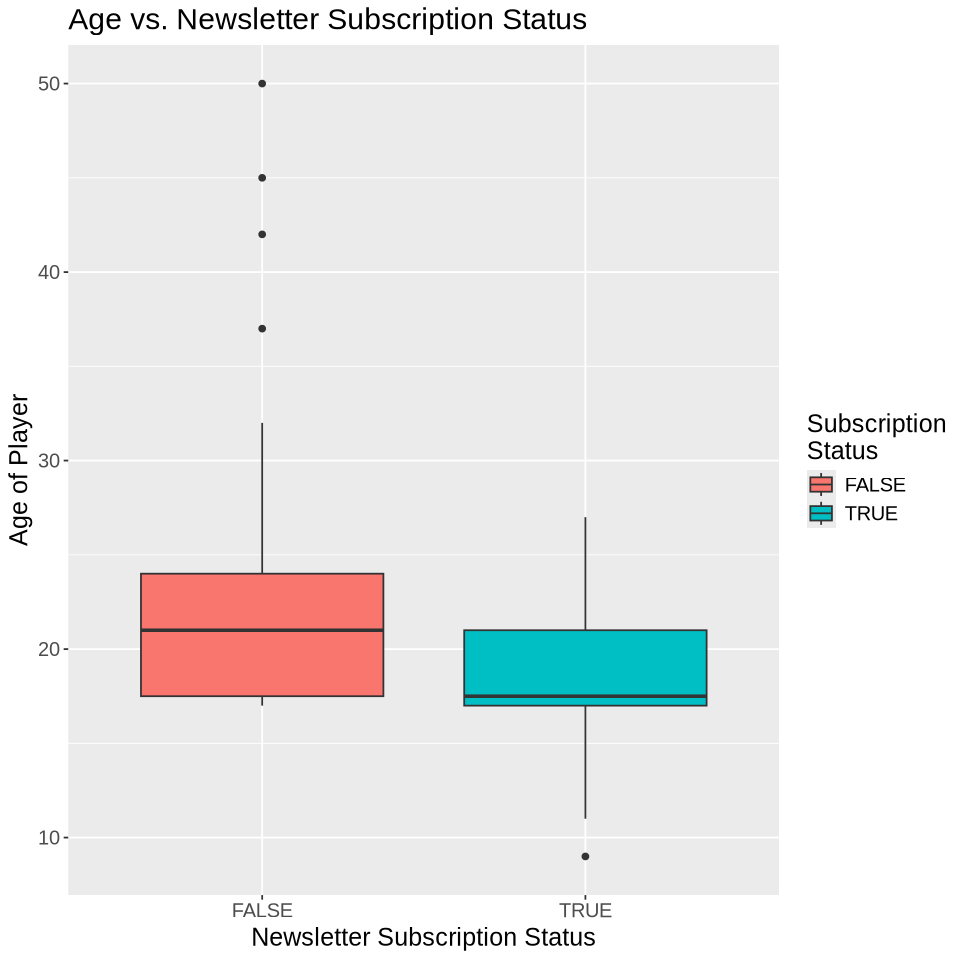

In [94]:
# 4. Exploratory visualizations
# a) finding relationships for the Age predictor:
options(repr.plot.width = 8, repr.plot.height = 8)
Age_boxplot <- ggplot(players_training, aes(x = subscribe, y = Age, fill = subscribe)) +
               geom_boxplot() +
               labs(x= "Subscription Status", y= "Age of Player", fill = "Subscription\nStatus", title = "Age vs. Subscription Status")+
               theme(text = element_text(size = 15))
Age_boxplot

**Plot Description**: The plot shows that players who subscribe to game-related newsletters tend to be younger, with a median age of around 17, while non-subscribers have a higher median age of approximately 22. Both groups have similar extent of age variations. There are four noticeable outliers in the non-subscriber group with significantly higher ages. This suggests that younger players may be more likely to subscribe to game-related newsletters.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


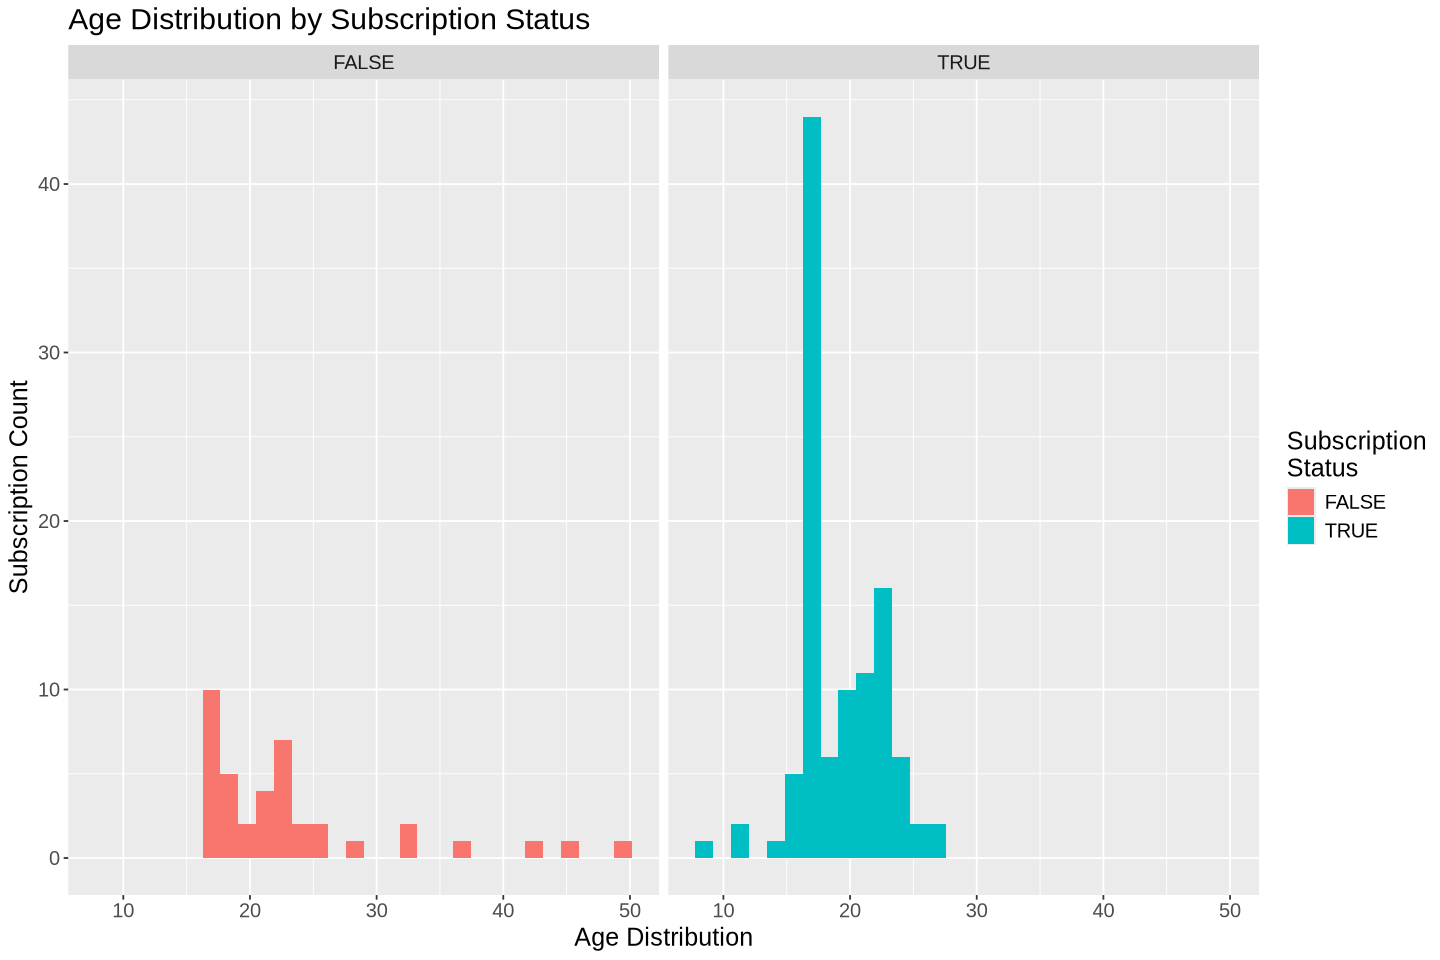

In [95]:
options(repr.plot.width = 12, repr.plot.height = 8)
Age_histogram <- ggplot(players_training, aes(x = Age, fill = subscribe)) +
                 geom_histogram() +
                 facet_grid(cols = vars(subscribe))+
                 labs(x = "Age Distribution", y = "Subscription Count", fill = "Subscription\nStatus", title = "Age Distribution by Subscription Status")+
                 theme(text = element_text(size = 15))
Age_histogram

**Plot Description**: The histograms show that all subscribed players are under the age of 30, with most around ages 15 to 20. In contrast, non-subscribed players have a wider age range, including older individuals, suggesting younger players are more likely to subscribe. The extremely high bar in subscribed group also indicate a significantly higher count of age 17-18, suggesting biased data. 

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 63 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


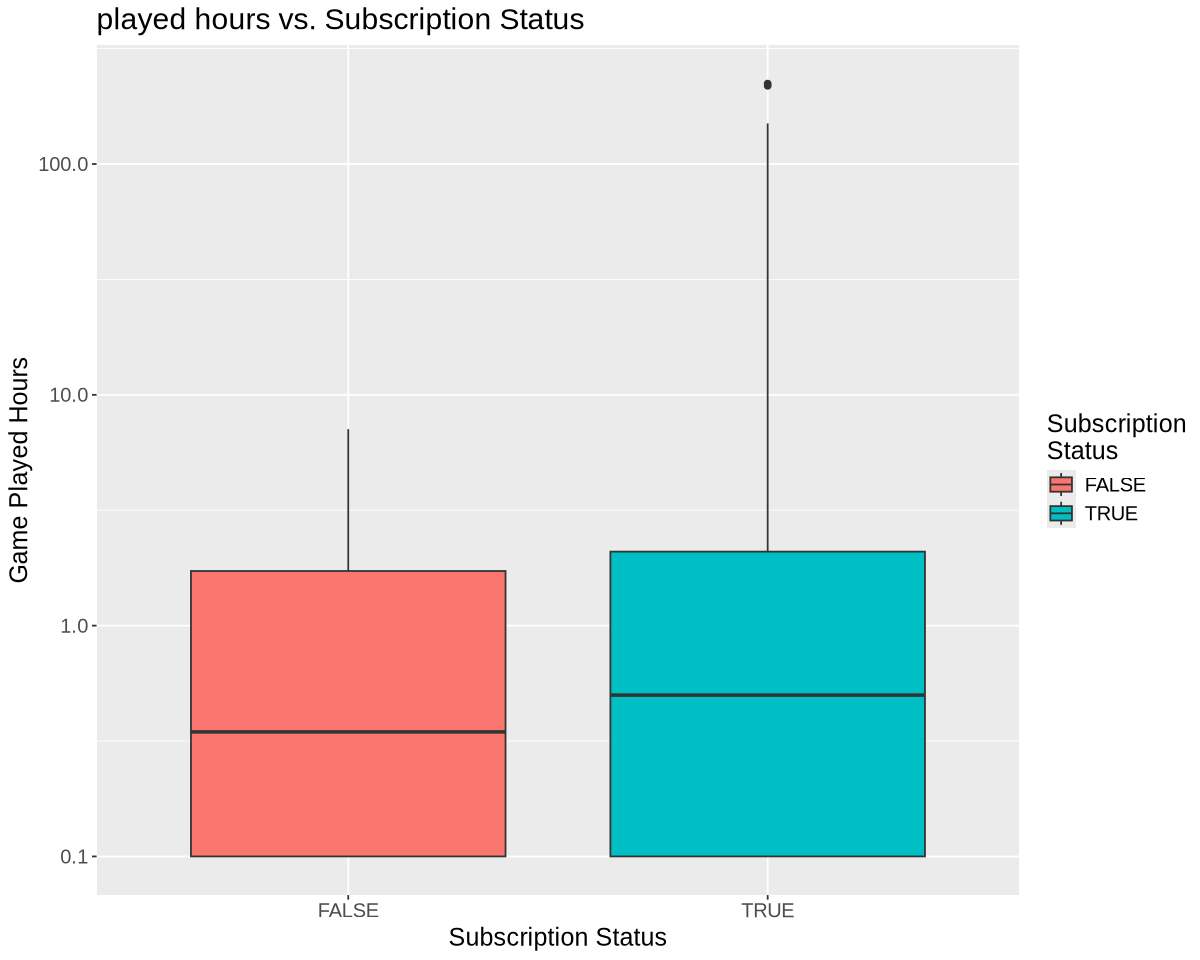

In [92]:
# b) finding relationships for the played_hours predictor:
options(repr.plot.width = 10, repr.plot.height = 8)
played_hours_boxplot <- ggplot(players_training, aes(x = subscribe, y = played_hours, fill = subscribe)) +
                        geom_boxplot() +
                        scale_y_log10(labels=label_comma())+
                        labs(x = "Subscription Status", y = "Game Played Hours", fill = "Subscription\nStatus", title = "played hours vs. Subscription Status")+
                        theme(text = element_text(size = 15))
played_hours_boxplot

**Plot Description**: Generally, this graph suggested a potential relationship between played hours and subscription status. It is observed here that the subscribed group have a higher median played hours compared to unsubscribed group. Additionally, there is a much greater variation in played hours for the subscribed group, which

## Methods and Plan

#### Method to use: Classification by K-nearest neighbors (KNN) classification algorithms
Why choose this method?
- Classification is appropriate for this predictive question as the question requires using given data on `played_hours` and `Age` to determine the class `subscribe` of a new sample.
- KNN classification algorith does not require specific data or shape assumptions for the algorithm to perform well, since it is based on how close a new sample is to nearby points.

Model Application:

- Model comparison and selection will be done through cross-validation.
- The function `initial_split()` was used to split the dataframe into 75% training and 25% testing data, stratifying for `subscribe`. The data need to be splitted before applying KNN analysis so the testing data will be "untouched". 
- Cross-validation will be used to asses the model's performance. The k-folds will likely be 5, or 10-folds. Additionally, tuning the model to determine the best K value will help maximize the accuracy of the classifier on new observations.  

Potential Limitations:

- KNN is very sensitive to scaling. If the ranges of values for `played_hours` and `Age` differ by a lot, biased neighbors will be chosen due to biased Euclidean distance, thus resulting in inaccurate prediction.
- Imbalance. If there are a lot more subscribed observations than unsubscribed, KNN will more likely to classify any new observations as subscribe, which is inaccurate.

